# 1. Univariate linear regression for binary classification

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from utils import *

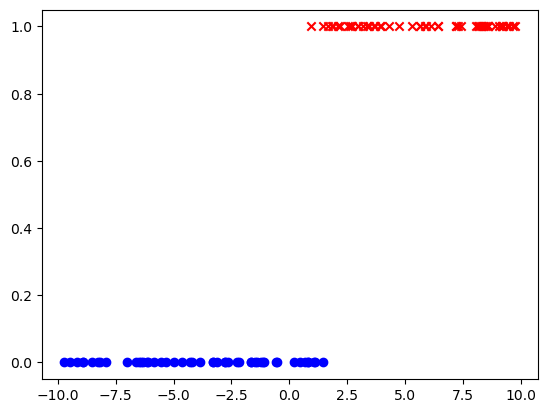

In [2]:
x_train = generate_univariate_x(100)
y_train = generate_binary_y(100)
plt_binary_classification(x_train, y_train)
plt.show()

In [3]:

linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w = linear_model.coef_[0]
b = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w:8.4f},{b:8.4f})")

(w,b) found by sklearn: (  0.0744,  0.4314)


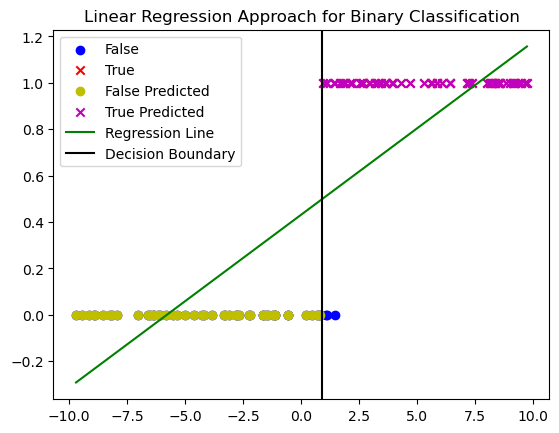

In [4]:
y_predicted = w * x_train + b
y_predicted[y_predicted < 0.5] = 0
y_predicted[y_predicted >= 0.5] = 1

plt_binary_classification(x_train, y_train)
plt.scatter(x_train[y_predicted == 0], y_predicted[y_predicted == 0], marker='o', c='y')
plt.scatter(x_train[y_predicted == 1], y_predicted[y_predicted == 1], marker='x', c='m')
plt.plot(x_train, w * x_train + b, c='g')
plt.axvline(x = (0.5 - b) / w, c='k')
plt.legend(['False', 'True', 'False Predicted', 'True Predicted', 'Regression Line', 'Decision Boundary'])
plt.title("Linear Regression Approach for Binary Classification")
plt.show()

In [5]:
f1 = f1_score(y_train, y_predicted)
accuracy = accuracy_score(y_train, y_predicted)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.9714
accuracy:   0.9700


# 2. 2 variable linear regression for binary classification

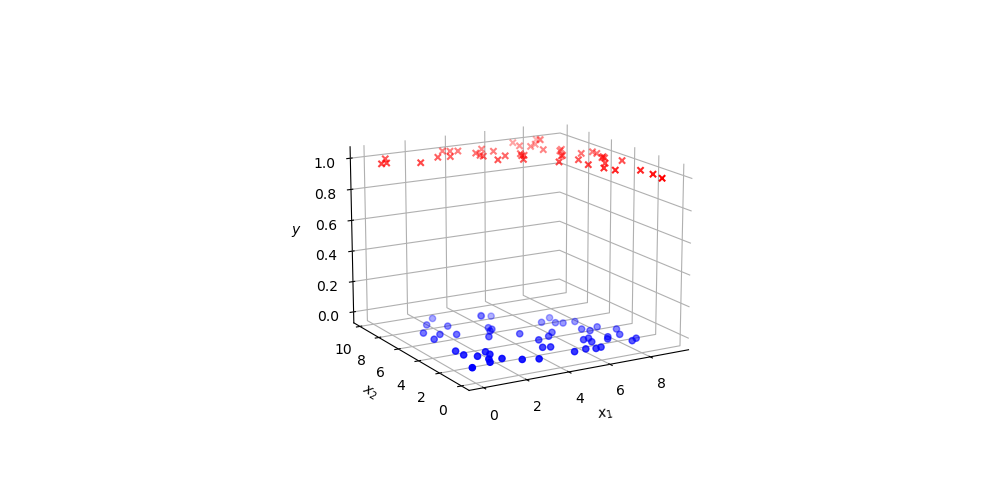

In [6]:
%matplotlib widget

X_train = generate_multivariate_x(100, 2)
y_train = generate_binary_y(100)

ax = plt_3d_binary_classification(X_train, y_train)

plt.show()

In [7]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w = linear_model.coef_
b = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w[0]:8.4f},{w[1]:8.4f},{b:8.4f})")

(w,b) found by sklearn: (  0.0802,  0.1056, -0.4538)


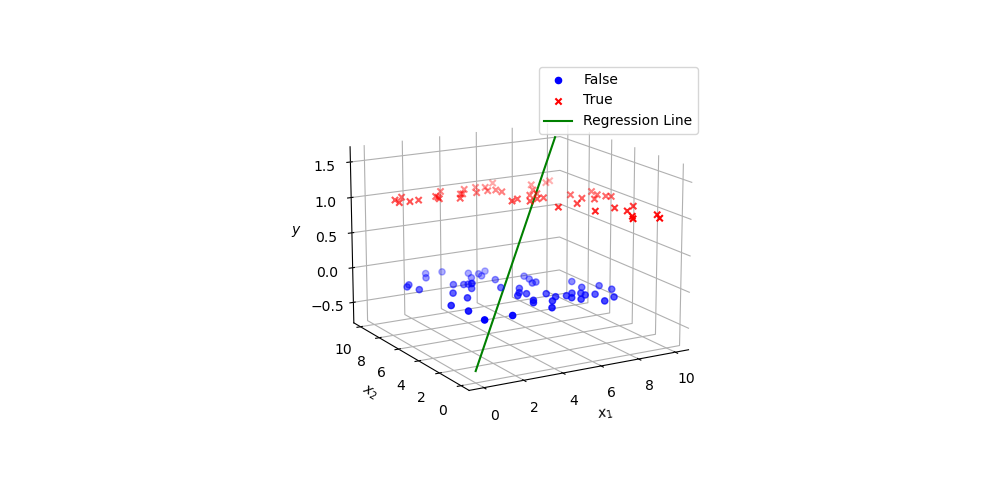

In [ ]:
plt.close('all')
y_predicted = w[0] * X_train[:, 0] + w[1] * X_train[:, 1] + b
reg_line_x1 = np.linspace(0, 10, 100)
reg_line_x2 = np.linspace(0, 10, 100)
reg_line_y = w[0] * reg_line_x1 + w[1] * reg_line_x2 + b
ax = plt_3d_binary_classification(X_train, y_train)
ax.plot(reg_line_x1, reg_line_x2, reg_line_y, c='g')
plt.legend(['False', 'True', 'Regression Line'])
plt.show()

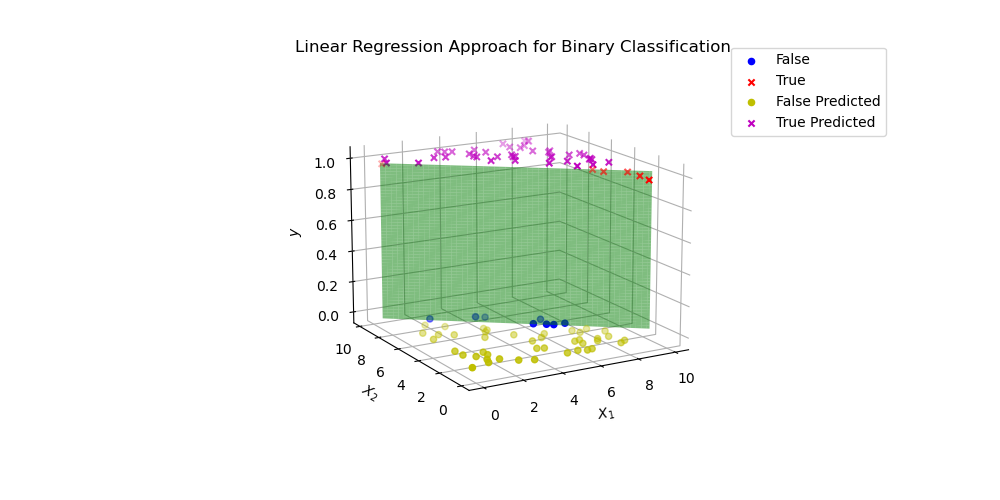

In [8]:
y_predicted = w[0] * X_train[:, 0] + w[1] * X_train[:, 1] + b
y_predicted[y_predicted < 0.5] = 0
y_predicted[y_predicted >= 0.5] = 1

X_false = X_train[(y_predicted == 0) & (y_train == 1) | (y_predicted == 1) & (y_train == 0)]
y_false  = y_train[(y_predicted == 0) & (y_train == 1) | (y_predicted == 1) & (y_train == 0)]

X_true = X_train[(y_predicted == 0) & (y_train == 0) | (y_predicted == 1) & (y_train == 1)]
y_true  = y_train[(y_predicted == 0) & (y_train == 0) | (y_predicted == 1) & (y_train == 1)]


ax = plt_3d_binary_classification(X_false, y_false)

ax.scatter(X_true[y_true == 0, 0], X_true[y_true == 0, 1], y_true[y_true == 0], marker='o', c='y')
ax.scatter(X_true[y_true == 1, 0], X_true[y_true == 1, 1], y_true[y_true == 1], marker='x', c='m')

plt.legend(['False', 'True', 'False Predicted', 'True Predicted', 'Regression Surface', 'Decision Boundary'], loc='upper left', bbox_to_anchor=(1.05, 1.05))
x1 = np.linspace(0, 10, 100)
x2 = (0.5 - b - w[0] * x1)/w[1]
z = np.linspace(0, 1, 100)
X1, Z = np.meshgrid(x1, z)
X2 = (0.5 - b - w[0] * X1)/w[1]
ax.plot_surface(X1, X2, Z, alpha=0.5, color='g')

ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$y$', rotation=90)
plt.title("Linear Regression Approach for Binary Classification")
plt.show()

In [9]:
f1 = f1_score(y_train, y_predicted)
accuracy = accuracy_score(y_train, y_predicted)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.8485
accuracy:   0.8500


# 3. Multivariate linear regression for binary classification

In [10]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_binary_y(100)

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w = linear_model.coef_
b = linear_model.intercept_

In [12]:
y_predicted = X_train @ w + b
y_predicted[y_predicted < 0.5] = 0
y_predicted[y_predicted >= 0.5] = 1

In [13]:
f1 = f1_score(y_train, y_predicted)
accuracy = accuracy_score(y_train, y_predicted)
print(f"f1 score: {f1:8.4f}")
print(f"accuracy: {accuracy:8.4f}")

f1 score:   0.9245
accuracy:   0.9200


# 4. Univariate linear regression for multi-class classification

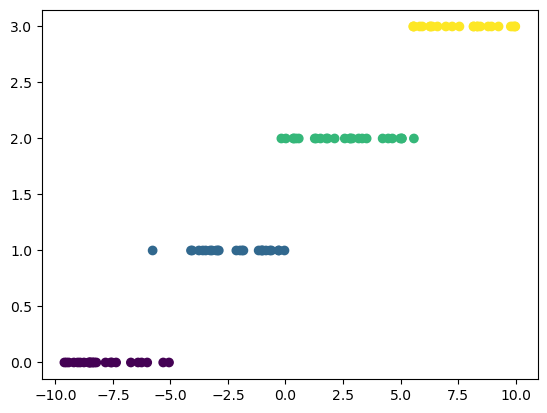

In [14]:
%matplotlib inline

x_train = generate_univariate_x(100)
y_train = generate_multiclass_y(100)

plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.show()

In [15]:
linear_model = LinearRegression()
linear_model.fit(x_train.reshape(-1, 1), y_train)
w = linear_model.coef_
b = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w[0]:8.4f},{b:8.4f})")

(w,b) found by sklearn: (  0.1814,  1.4940)


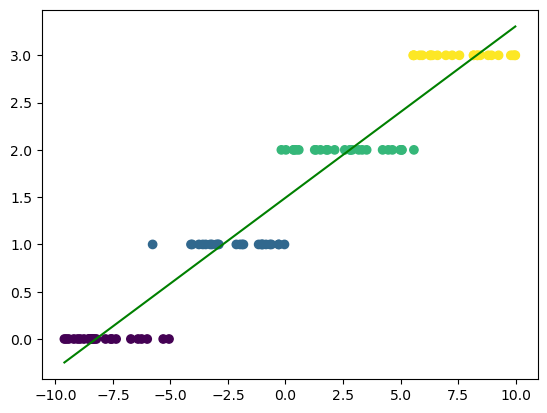

In [16]:
plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.plot(x_train, w * x_train + b, c='g')
plt.show()

In [17]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


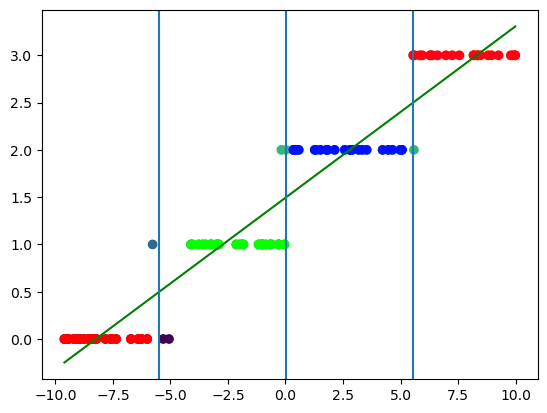

In [18]:
y_predicted = w * x_train + b
y_predicted = classify(y_predicted, y_borders, classes)

true_predicted = y_predicted == y_train
x_true = x_train[true_predicted]
y_true = y_train[true_predicted]

plt.scatter(x_train, y_train, cmap='viridis', c=y_train)
plt.scatter(x_true, y_true, cmap='hsv', c=y_true)
plt.plot(x_train, w * x_train + b, c='g')
for i in y_borders:
    solution = (i - b )/ w
    plt.axvline(x=solution)
plt.show()

In [19]:
accuracy = accuracy_score(y_train, y_predicted)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.9400


# 5. 2 variable linear regression for multi-class classification

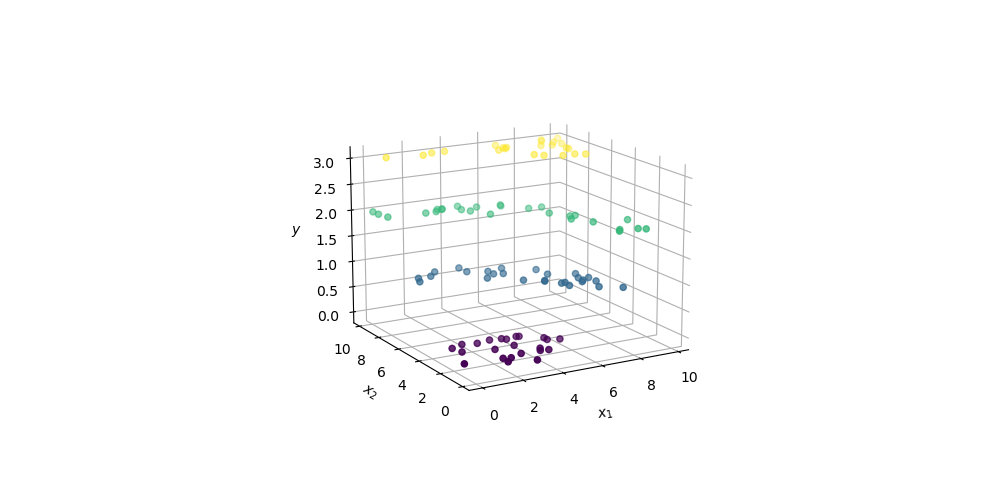

In [20]:
%matplotlib widget

X_train = generate_multivariate_x(100, 2)
y_train = generate_multiclass_y(100)

ax = plt_3d_multiclass_classification(X_train, y_train)

plt.show()

In [21]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w = linear_model.coef_
b = linear_model.intercept_
print(f"(w,b) found by sklearn: ({w[0]:8.4f},{w[1]:8.4f},{b:8.4f})")

(w,b) found by sklearn: (  0.2071,  0.2777, -1.0247)


In [22]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


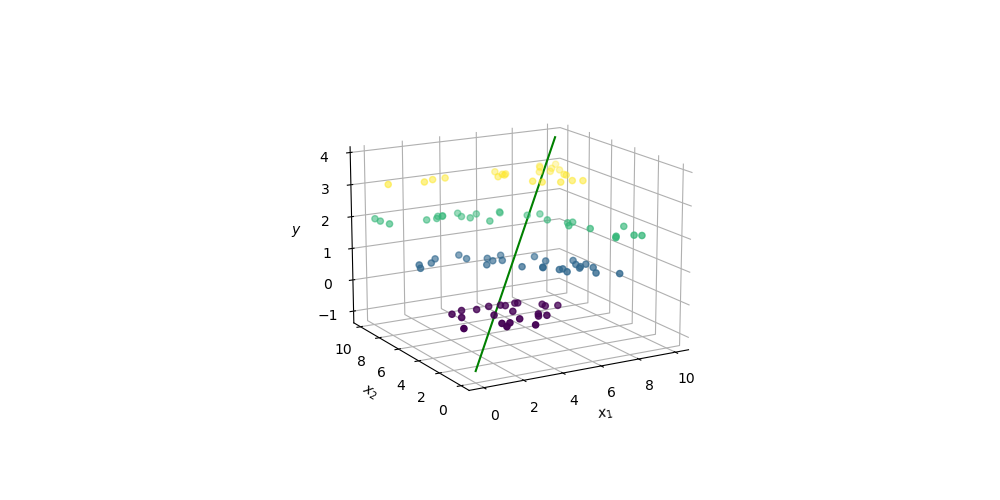

In [23]:
ax = plt_3d_multiclass_classification(X_train, y_train)

y_predicted = X_train @ w + b

reg_line_x1 = np.linspace(0, 10, 100)
reg_line_x2 = np.linspace(0, 10, 100)
reg_line_y = w[0] * reg_line_x1 + w[1] * reg_line_x2 + b

ax.plot(reg_line_x1, reg_line_x2, reg_line_y, c='g')
plt.show()

In [24]:
y_predicted = classify(y_predicted, y_borders, classes)

accuracy = accuracy_score(y_train, y_predicted)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.7600


# 6. Mutli variable linear regression for multi-class classification

In [25]:
X_train = generate_multivariate_x(100, 5)
y_train = generate_multiclass_y(100)

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
w = linear_model.coef_
b = linear_model.intercept_

In [27]:
classes, class_num = class_info(y_train)
y_borders = get_borders(classes)
print(f"number of classes: {class_num}")
print(f"borders for classes: {y_borders}")

number of classes: 4
borders for classes: [0.5 1.5 2.5]


In [28]:
y_predicted = X_train @ w + b
y_predicted = classify(y_predicted, y_borders, classes)

In [29]:
accuracy = accuracy_score(y_train, y_predicted)
print(f"accuracy: {accuracy:8.4f}")

accuracy:   0.7200
